<a href="https://colab.research.google.com/github/Jnanasagara/machine-learning-lab/blob/main/lab4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


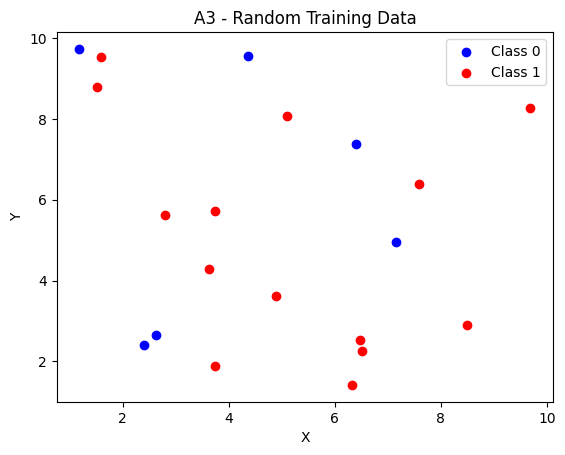

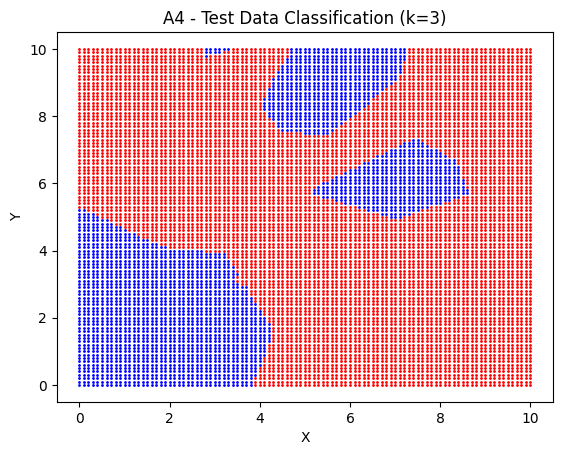

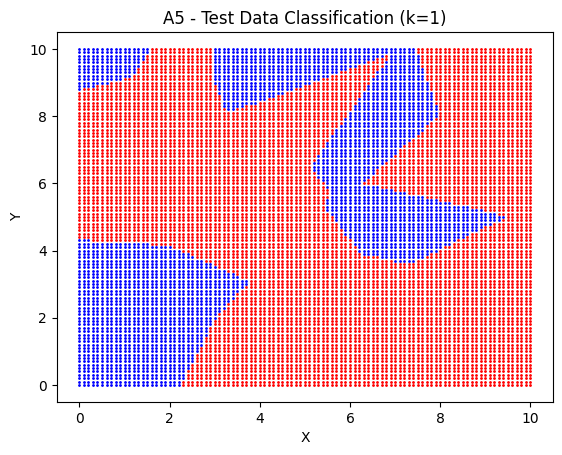

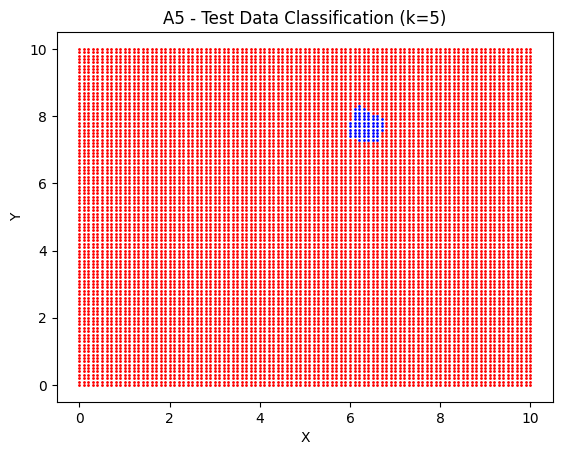

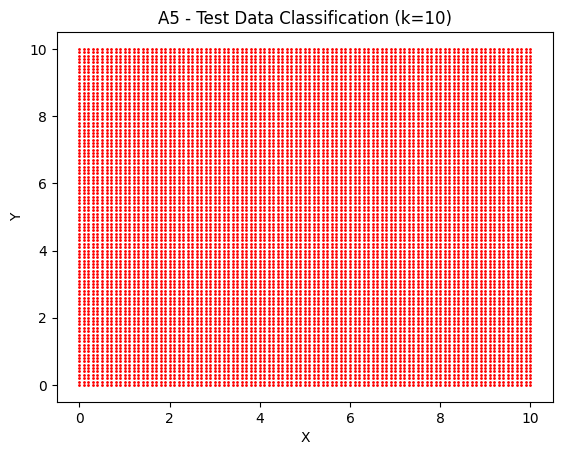

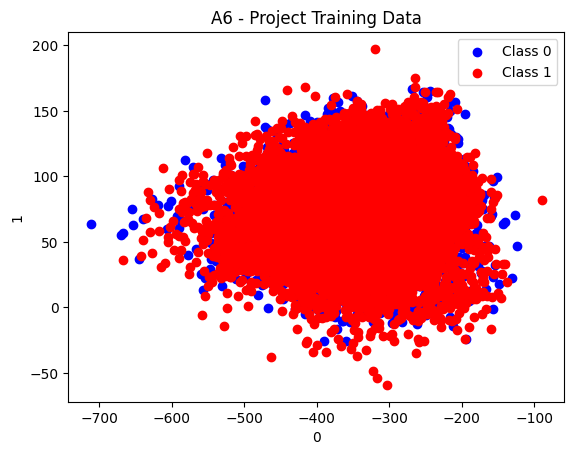

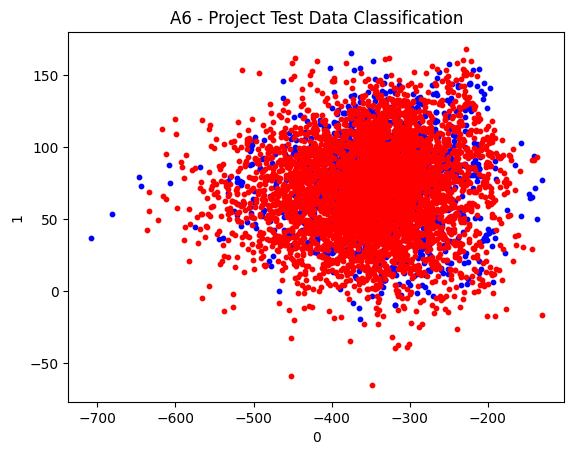


=== A1 - Classification Metrics ===
Confusion Matrix (Train):
 [[2831 1797]
 [1107 8762]]
Confusion Matrix (Test):
 [[ 644 1324]
 [1105 3140]]
Precision (Train): 0.8298
Recall (Train): 0.8878
F1-Score (Train): 0.8578
Precision (Test): 0.7034
Recall (Test): 0.7397
F1-Score (Test): 0.7211

=== A2 - Regression Metrics ===
MSE: 0.2137
RMSE: 0.4623
MAPE: 960622841207428.1250
R2: 0.0125

=== A7 - Hyperparameter Tuning ===
Best k: 9
Best CV Accuracy: 0.6303


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score,
    mean_squared_error, mean_absolute_percentage_error, r2_score
)

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ml-stuttering-events-dataset/cleaned-sep28k.csv")
X = df[[str(i) for i in range(13)]]  # MFCC features 0–12
y = df["Stuttering"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# A1 - Confusion matrix & metrics
def evaluate_knn(k=3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        "cm_train": confusion_matrix(y_train, y_train_pred),
        "cm_test": confusion_matrix(y_test, y_test_pred),
        "precision_train": precision_score(y_train, y_train_pred),
        "recall_train": recall_score(y_train, y_train_pred),
        "f1_train": f1_score(y_train, y_train_pred),
        "precision_test": precision_score(y_test, y_test_pred),
        "recall_test": recall_score(y_test, y_test_pred),
        "f1_test": f1_score(y_test, y_test_pred)
    }
    return model, metrics

knn_model, knn_metrics = evaluate_knn(k=3)

# A2 - Regression metrics
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)

reg_metrics = {
    "MSE": mean_squared_error(y_test, y_pred_reg),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_reg)),
    "MAPE": mean_absolute_percentage_error(y_test, y_pred_reg),
    "R2": r2_score(y_test, y_pred_reg)
}

# A3 - Generate random points & plot
np.random.seed(42)
X_train_rand = np.random.uniform(1, 10, (20, 2))
y_train_rand = np.random.choice([0, 1], size=20)

plt.figure()
for cls, color in zip([0, 1], ["blue", "red"]):
    plt.scatter(X_train_rand[y_train_rand == cls, 0],
                X_train_rand[y_train_rand == cls, 1], c=color, label=f"Class {cls}")
plt.title("A3 - Random Training Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# A4 - Classify 0–10 grid (k=3)
X_test_rand = np.array([[x, y] for x in np.arange(0, 10.1, 0.1)
                        for y in np.arange(0, 10.1, 0.1)])
knn_rand = KNeighborsClassifier(n_neighbors=3)
knn_rand.fit(X_train_rand, y_train_rand)
y_test_rand_pred = knn_rand.predict(X_test_rand)

plt.figure()
for cls, color in zip([0, 1], ["blue", "red"]):
    plt.scatter(X_test_rand[y_test_rand_pred == cls, 0],
                X_test_rand[y_test_rand_pred == cls, 1], c=color, s=1)
plt.title("A4 - Test Data Classification (k=3)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# A5 - Repeat for k = 1, 5, 10
for k in [1, 5, 10]:
    knn_rand = KNeighborsClassifier(n_neighbors=k)
    knn_rand.fit(X_train_rand, y_train_rand)
    y_test_rand_pred = knn_rand.predict(X_test_rand)

    plt.figure()
    for cls, color in zip([0, 1], ["blue", "red"]):
        plt.scatter(X_test_rand[y_test_rand_pred == cls, 0],
                    X_test_rand[y_test_rand_pred == cls, 1], c=color, s=1)
    plt.title(f"A5 - Test Data Classification (k={k})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# A6 - Repeat A3–A5 for project data (MFCC[0], MFCC[1])
feat1, feat2 = "0", "1"
X_train_proj = X_train[[feat1, feat2]]
X_test_proj = X_test[[feat1, feat2]]

knn_proj = KNeighborsClassifier(n_neighbors=3)
knn_proj.fit(X_train_proj, y_train)

# Plot training data
plt.figure()
for cls, color in zip([0, 1], ["blue", "red"]):
    plt.scatter(X_train_proj[y_train == cls][feat1],
                X_train_proj[y_train == cls][feat2], c=color, label=f"Class {cls}")
plt.title("A6 - Project Training Data")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend()
plt.show()

# Plot test predictions
proj_pred = knn_proj.predict(X_test_proj)
plt.figure()
for cls, color in zip([0, 1], ["blue", "red"]):
    plt.scatter(X_test_proj[proj_pred == cls][feat1],
                X_test_proj[proj_pred == cls][feat2], c=color, s=10)
plt.title("A6 - Project Test Data Classification")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.show()

# A7 - Hyperparameter tuning (fast version)
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.3, random_state=42)
param_grid_fast = {"n_neighbors": list(range(1, 11))}
grid_search_fast = GridSearchCV(KNeighborsClassifier(), param_grid_fast, cv=3, scoring="accuracy")
grid_search_fast.fit(X_sample, y_sample)

best_k_fast = grid_search_fast.best_params_["n_neighbors"]
best_score_fast = grid_search_fast.best_score_

# Print all results
print("\n=== A1 - Classification Metrics ===")
print("Confusion Matrix (Train):\n", knn_metrics["cm_train"])
print("Confusion Matrix (Test):\n", knn_metrics["cm_test"])
print(f"Precision (Train): {knn_metrics['precision_train']:.4f}")
print(f"Recall (Train): {knn_metrics['recall_train']:.4f}")
print(f"F1-Score (Train): {knn_metrics['f1_train']:.4f}")
print(f"Precision (Test): {knn_metrics['precision_test']:.4f}")
print(f"Recall (Test): {knn_metrics['recall_test']:.4f}")
print(f"F1-Score (Test): {knn_metrics['f1_test']:.4f}")

print("\n=== A2 - Regression Metrics ===")
for k, v in reg_metrics.items():
    print(f"{k}: {v:.4f}")

print("\n=== A7 - Hyperparameter Tuning ===")
print(f"Best k: {best_k_fast}")
print(f"Best CV Accuracy: {best_score_fast:.4f}")
